# Plotting an HD-scaled curve

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

devices = tf.config.experimental.get_visible_devices('GPU')
if len(devices) > 0:
    tf.config.experimental.set_memory_growth(devices[0], True)

In [3]:
import harmonic_distance as hd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
C = 0.1
c = tf.Variable(C, dtype=tf.float64)

In [5]:
vs = hd.vectors.VectorSpace(dimensions=1)

In [11]:
@tf.function
def loss(x, c=C):
    return hd.optimize.parabolic_loss_function(vs.pds, vs.hds, x, curves=(c))

exp = np.log2([1.0, 6, 2, 3, 4])
res = loss(np.log2([1.0, 1.5, 2, 3, 4]))
np.testing.assert_equal(exp, res)
res

<tf.Tensor: id=6461, shape=(5,), dtype=float64, numpy=array([0.       , 2.5849625, 1.       , 1.5849625, 2.       ])>

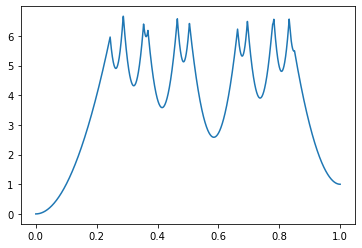

In [12]:
c.assign(0.01)
xs = np.linspace(0.0, 1.0, 2048)
ys = loss(tf.constant(xs), c=c)
plt.plot(xs, ys)
plt.show()